In [26]:
#import libraries
import cv2 
import matplotlib.pyplot as plt
from deepface import DeepFace

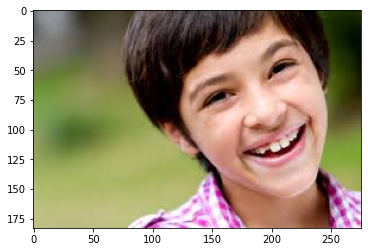

In [27]:
#load and show the image
img = cv2.imread('happy_boy.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [28]:
predictions = DeepFace.analyze(img)

Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.50it/s]


In [29]:
predictions

{'emotion': {'angry': 1.430173780105076e-17,
  'disgust': 1.1524123711126978e-32,
  'fear': 3.0983613255880015e-20,
  'happy': 99.99908804888058,
  'sad': 1.185362957895305e-15,
  'surprise': 9.135410854681098e-10,
  'neutral': 0.0009127758492647245},
 'dominant_emotion': 'happy',
 'age': '24',
 'gender': 'Man',
 'race': {'asian': 0.40956728738947434,
  'indian': 0.5402008393526577,
  'black': 0.02206868070633669,
  'white': 63.35368534050497,
  'middle eastern': 13.875147037216845,
  'latino hispanic': 21.799334692915362},
 'dominant_race': 'white'}

Draw a rectangle accross the face

In [30]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [31]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray, 1.1, 4)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

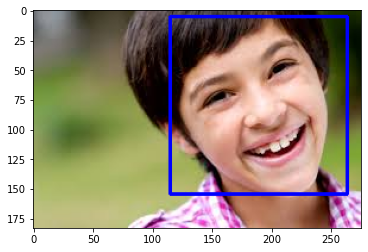

In [32]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [33]:
# add text to the rectangle
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img, 
           predictions['dominant_emotion'],
           (0, 50),
           font, 1,
           (0, 0, 255),
           2,
           cv2.LINE_4)

array([[[112, 107, 104],
        [117, 112, 109],
        [124, 119, 116],
        ...,
        [  1,  46,  29],
        [  2,  47,  30],
        [  2,  47,  30]],

       [[112, 107, 104],
        [116, 111, 108],
        [124, 119, 116],
        ...,
        [  1,  46,  29],
        [  1,  46,  29],
        [  1,  46,  29]],

       [[112, 107, 104],
        [116, 111, 108],
        [123, 118, 115],
        ...,
        [  1,  45,  28],
        [  1,  45,  28],
        [  1,  45,  28]],

       ...,

       [[132, 191, 193],
        [132, 191, 193],
        [132, 191, 193],
        ...,
        [237, 171, 253],
        [223, 157, 238],
        [224, 158, 239]],

       [[132, 191, 193],
        [132, 191, 193],
        [132, 191, 193],
        ...,
        [255, 220, 255],
        [251, 204, 253],
        [232, 186, 233]],

       [[134, 191, 193],
        [134, 191, 193],
        [134, 191, 193],
        ...,
        [255, 244, 255],
        [255, 238, 255],
        [253, 225, 248]]

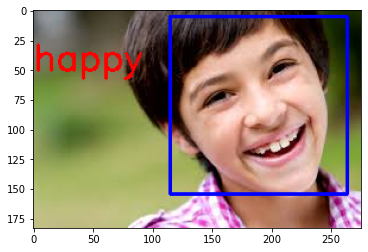

In [34]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

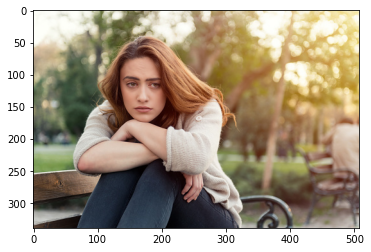

In [36]:
img = cv2.imread('sad_woman.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [37]:
predictions = DeepFace.analyze(img)
predictions

Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.39it/s]


{'emotion': {'angry': 9.579261392354965,
  'disgust': 0.0019221193724661134,
  'fear': 9.635886549949646,
  'happy': 0.011026498395949602,
  'sad': 43.37784945964813,
  'surprise': 0.00017892277810460655,
  'neutral': 37.39387392997742},
 'dominant_emotion': 'sad',
 'age': '22',
 'gender': 'Man',
 'race': {'asian': 21.010984242617145,
  'indian': 14.395976924656447,
  'black': 4.049361365995488,
  'white': 17.19570262406484,
  'middle eastern': 11.047928693767112,
  'latino hispanic': 32.30004503131181},
 'dominant_race': 'latino hispanic'}

In [72]:
# real - time application
import cv2
from deepface import DeepFace

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    cap = cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError('cannot open webcam')
    
while True:
    ref, frame = cap.read()
    result = DeepFace.analyze(frame, actions = ['emotion'], enforce_detection = False)
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    cv2.putText(frame, 
           result['dominant_emotion'],
           (0, 50),
           font, 1,
           (0, 0, 255),
           2,
           cv2.LINE_4)
    
    cv2.imshow('Demo video', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
    cap.release()
    cv2.destroyAllWindows()

TypeError: object of type 'NoneType' has no len()